## LIME explanations for image classification 

In [1]:
# Notebook based on: https://github.com/marcotcr/lime/blob/ce2db6f20f47c3330beb107bb17fd25840ca4606/doc/notebooks/Tutorial%20-%20Image%20Classification%20Keras.ipynb

import os
import keras
from keras.applications import inception_v3 as inc_net
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from skimage.segmentation import mark_boundaries
import skimage
print('Notebook run using keras:', keras.__version__)

Notebook run using keras: 3.8.0


In [2]:
# MAC users: if this command errors, just browse to Applications/Python 3.6 and double-click Install Certificates.command
# https://stackoverflow.com/questions/42098126/mac-osx-python-ssl-sslerror-ssl-certificate-verify-failed-certificate-verify
inet_model = inc_net.InceptionV3()

In [3]:
def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=(299, 299))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = inc_net.preprocess_input(x)
        out.append(x)
    return np.vstack(out)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 675ms/step
('n02133161', 'American_black_bear', np.float32(0.6372795))
('n02105056', 'groenendael', np.float32(0.031802878))
('n02104365', 'schipperke', np.float32(0.029921403))
('n01883070', 'wombat', np.float32(0.028507316))
('n01877812', 'wallaby', np.float32(0.025098572))


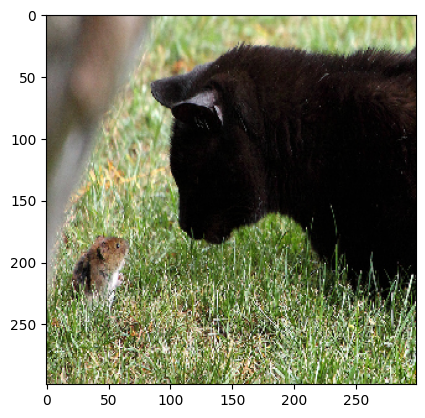

In [4]:
images = transform_img_fn([os.path.join('data','cat_mouse.jpg')])
# I'm dividing by 2 and adding 0.5 because of how this Inception represents images
plt.imshow(images[0] / 2 + 0.5)
preds = inet_model.predict(images)
decode_predictions(preds)
for x in decode_predictions(preds)[0]:
    print(x)

In [5]:
print("Indices of the top5 labels:")
print(preds[0].argsort()[-5:][::-1])

Indices of the top5 labels:
[295 224 223 106 104]


In [6]:
%load_ext autoreload
%autoreload 2
import os,sys
try:
    import lime
except:
    sys.path.append(os.path.join('..', '..')) # add the current directory
    import lime
from lime import lime_image

In [7]:
# LIME explanation
explainer = lime_image.LimeImageExplainer()

In [8]:
%%time
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(images[0], inet_model.predict, top_labels=5, hide_color=0, num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 924ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

Nb of superpixels:  55


/var/folders/m5/rz4nd0750t369g1nvyfd5cnm0000gp/T/ipykernel_96075/3362635463.py:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skimage.io.imshow(skimage.segmentation.mark_boundaries(images[0]/2+0.5, explanation.segments))


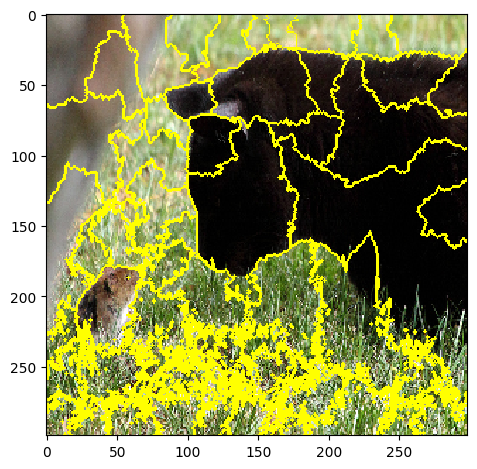

In [9]:
# All superpixels
skimage.io.imshow(skimage.segmentation.mark_boundaries(images[0]/2+0.5, explanation.segments))
print("Nb of superpixels: ",len(np.unique(explanation.segments)))

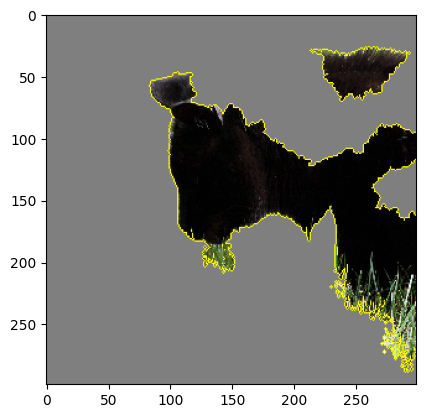

In [10]:
# Visualizing the explanation (i.e. the 5 most important superpixels supporting the top1 class)

temp, mask = explanation.get_image_and_mask(295, positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

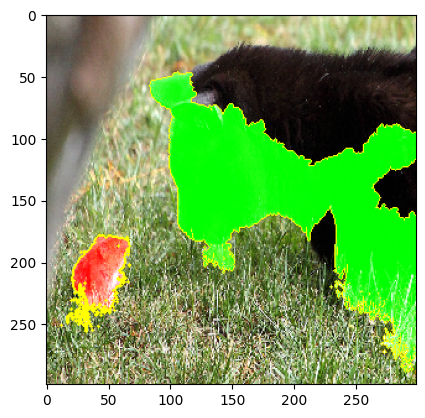

In [11]:
# Visualizing the 5 most important superpixels, either supporting the top1 class or not
temp, mask = explanation.get_image_and_mask(295, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

### Second image